In [1]:
from NNScratchLib.models.MultiClassModels import NeuralNetwork
from NNScratchLib.models.Layers import SequentialLayer

from NNScratchLib.functions import activation_functions
from NNScratchLib.functions import measure_functions
from NNScratchLib.functions import optimizers
from NNScratchLib.functions import generative_optimizers

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.preprocessing import OneHotEncoder

from sklearn.metrics import confusion_matrix

import tensorflow as tf
from tensorflow.keras.datasets import mnist

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

## Red Neuronal Para Clasificar el Dataset de Iris

Definiremos una red neuronal de 4 entradas, con una capa oculta de 4 neuronas, y una capa de salida de 3 neuronas. La función de activación para la capa oculta será la sigmoide y para la de salida la función softmax. Como el backpropagation ya tiene en cuenta la función de activación en la última capa, no es necesario definirla su derivada.

### Definición de la red

In [252]:
nn = NeuralNetwork()
nn.set(SequentialLayer(4, 5, activation=activation_functions.sigmoid, 
                            activation_derivate=activation_functions.sigmoid_derivate))
nn.set(SequentialLayer(5, 3, activation=activation_functions.softmax,
                            activation_derivate=activation_functions.mse_derivate))

### Dataset de Iris

Cargamos el dataset IRIS, y dividimos el conjunto de datos en en train y test.

In [253]:
iris = pd.read_csv('NNScratchLib/datasets/iris')
iris = shuffle(iris)

X = iris.iloc[:, 0:4].values
y = iris.iloc[:, 4].values

enc = OneHotEncoder()
y = enc.fit_transform(y.reshape(-1,1)).toarray()

In [254]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Entrenamiento de la red

A continuación, entrenamos el modelo con el conjunto de entrenamiento, y mostramos la evolución del error en cada iteración. Utilizaremos el optimizador del descenso del gradiente clásico, con una tasa de aprendizaje de 0.01

In [96]:
print("accuracy before training: ", measure_functions.accuracy(y_test, [nn.feedfoward(x) for x in X_test]))
(acc, loss) = optimizers.gradient_descent(nn, X_train, y_train, measure_functions.accuracy, epochs=300, learning_rate=0.01)

accuracy before training:  0.4
epoch   0 - Loss 2.62629, Accuracy 0.37500
epoch  10 - Loss 1.01127, Accuracy 0.54167
epoch  20 - Loss 0.94869, Accuracy 0.62500
epoch  30 - Loss 0.83747, Accuracy 0.62500
epoch  40 - Loss 0.77782, Accuracy 0.62500


epoch  50 - Loss 0.74786, Accuracy 0.62500
epoch  60 - Loss 0.73136, Accuracy 0.62500
epoch  70 - Loss 0.72189, Accuracy 0.62500
epoch  80 - Loss 0.71643, Accuracy 0.66667
epoch  90 - Loss 0.71316, Accuracy 0.66667
epoch 100 - Loss 0.71076, Accuracy 0.79167
epoch 110 - Loss 0.70825, Accuracy 0.79167
epoch 120 - Loss 0.70495, Accuracy 0.79167
epoch 130 - Loss 0.70045, Accuracy 0.79167
epoch 140 - Loss 0.69456, Accuracy 0.79167
epoch 150 - Loss 0.68729, Accuracy 0.79167
epoch 160 - Loss 0.67874, Accuracy 0.79167
epoch 170 - Loss 0.66909, Accuracy 0.79167
epoch 180 - Loss 0.65855, Accuracy 0.79167
epoch 190 - Loss 0.64733, Accuracy 0.79167
epoch 200 - Loss 0.63565, Accuracy 0.79167
epoch 210 - Loss 0.62368, Accuracy 0.83333
epoch 220 - Loss 0.61158, Accuracy 0.83333
epoch 230 - Loss 0.59947, Accuracy 0.83333
epoch 240 - Loss 0.58746, Accuracy 0.83333
epoch 250 - Loss 0.57561, Accuracy 0.83333
epoch 260 - Loss 0.56399, Accuracy 0.83333
epoch 270 - Loss 0.55263, Accuracy 0.83333
epoch 280 -

In [97]:
Y_pred = [nn.feedfoward(x) for x in X_test]
print("Accuracy after training (on test): ", measure_functions.accuracy(y_test, Y_pred))

Accuracy after training (on test):  1.0


Si representamos la matriz de confusión del modelo

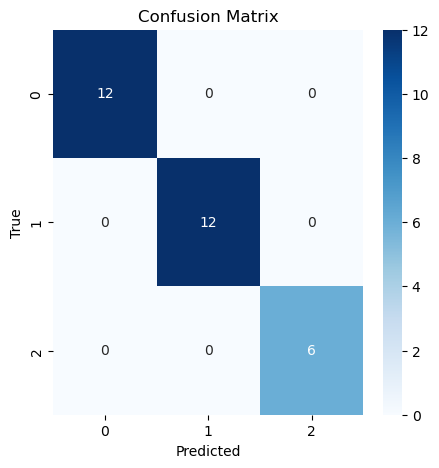

In [98]:
Y_pred = [np.argmax(nn.feedfoward(x)) for x in X_test]
Y_test = [np.argmax(y) for y in y_test]

cm = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

A continuación, repetiremos el proceso para clasificar el mismo dataset, esta vez con un modelo de mayor complejidad, con 3 capas ocultas y una de salida, con el objetivo de probar la capacidad de generalización del backpropagation.

In [ ]:
nn = NeuralNetwork()
nn.set(SequentialLayer(4, 20, activation=activation_functions.sigmoid, 
                            activation_derivate=activation_functions.sigmoid_derivate))
nn.set(SequentialLayer(20, 10, activation=activation_functions.sigmoid, 
                            activation_derivate=activation_functions.sigmoid_derivate))
nn.set(SequentialLayer(10, 6, activation=activation_functions.sigmoid, 
                            activation_derivate=activation_functions.sigmoid_derivate))
nn.set(SequentialLayer(6, 3, activation=activation_functions.softmax,
                            activation_derivate=activation_functions.softmax_derivate))

In [ ]:
print("accuracy before training: ", measure_functions.accuracy(y_test, [nn.feedfoward(x) for x in X_test]))
(acc, loss) = optimizers.gradient_descent(nn, X_train, y_train, measure_functions.accuracy, epochs=100, learning_rate=0.01)

accuracy before training:  0.3333333333333333
epoch   0 - Loss 3.04443, Accuracy 0.58333
epoch  10 - Loss 0.64160, Accuracy 0.66667
epoch  20 - Loss 0.52756, Accuracy 0.87500
epoch  30 - Loss 0.39850, Accuracy 0.95833
epoch  40 - Loss 0.29344, Accuracy 1.00000
epoch  50 - Loss 0.21887, Accuracy 1.00000
epoch  60 - Loss 0.17146, Accuracy 1.00000
epoch  70 - Loss 0.14322, Accuracy 1.00000
epoch  80 - Loss 0.12736, Accuracy 1.00000
epoch  90 - Loss 0.11924, Accuracy 1.00000


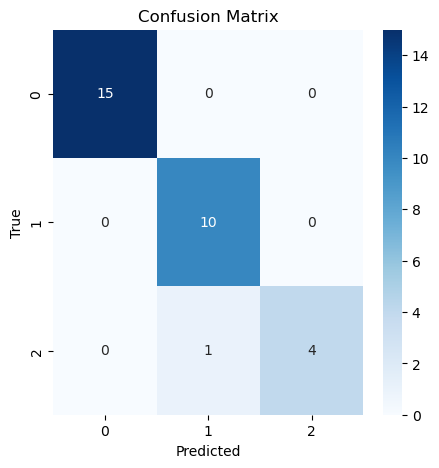

In [ ]:
Y_pred = [np.argmax(nn.feedfoward(x)) for x in X_test]
Y_test = [np.argmax(y) for y in y_test]

cm = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Red Neuronal Para Clasificar Cáncer de Mama

Para esta sección, presentaremos el rendimiento del modelo haciendo uso de la representación en el espacio ROC. Para ello, lo primero será importar las librerías necesarias para trabajar con este tipo de representaciones.

In [2]:
from sklearn.metrics import roc_curve, auc
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

Hecho esto, procedemos con el código. Comenzaremos cargando y procesando el dataset, y dividiéndolo en train y test.

In [3]:
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

In [4]:
scaler_X = StandardScaler()
X_normalized = scaler_X.fit_transform(X)

enc = OneHotEncoder()
y_encoded = enc.fit_transform(y.reshape(-1, 1)).toarray()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_encoded, test_size=0.2)

Y ahora sí, evaluamos el rendimiento para una red neuronal de 5 capas con 30, 20, 10, 5 y 2 neuronas respectivamente. La función de activación para las capas ocultas será la sigmoide, y para la de salida la función softmax.

In [26]:
nn_untrained = NeuralNetwork()
nn_untrained.set(SequentialLayer(30, 20, activation=activation_functions.sigmoid,
                                 activation_derivate=activation_functions.sigmoid_derivate))
nn_untrained.set(SequentialLayer(20, 10, activation=activation_functions.sigmoid,
                                 activation_derivate=activation_functions.sigmoid_derivate))
nn_untrained.set(SequentialLayer(10, 5, activation=activation_functions.sigmoid,
                                    activation_derivate=activation_functions.sigmoid_derivate))
nn_untrained.set(SequentialLayer(5, 2, activation=activation_functions.softmax,
                                 activation_derivate=activation_functions.softmax_derivate))

Y_pred_untrained = [np.argmax(nn_untrained.feedfoward(x)) for x in X_test]

In [27]:
fpr_untrained, tpr_untrained, _ = roc_curve(y_test[:, 1], Y_pred_untrained)
roc_auc_untrained = auc(fpr_untrained, tpr_untrained)

tpr_iterations = []
fpr_iterations = []

ns_probs = [0 for _ in range(len(y_test))]
ns_fpr, ns_tpr, _ = roc_curve(y_test[:, 1], ns_probs)
tpr_iterations.append(ns_tpr)
fpr_iterations.append(ns_fpr)

In [28]:
for i in range(10):
    print("Iteration: ", i + 1)
    nn = NeuralNetwork()
    nn.set(SequentialLayer(30, 20, activation=activation_functions.sigmoid,
                           activation_derivate=activation_functions.sigmoid_derivate))
    nn.set(SequentialLayer(20, 10, activation=activation_functions.sigmoid,
                            activation_derivate=activation_functions.sigmoid_derivate))
    nn.set(SequentialLayer(10, 5, activation=activation_functions.sigmoid,
                            activation_derivate=activation_functions.sigmoid_derivate))
    nn.set(SequentialLayer(5, 2, activation=activation_functions.softmax,
                           activation_derivate=activation_functions.softmax_derivate))

    (acc, loss) = optimizers.gradient_descent(nn, X_train, y_train, measure_functions.accuracy, epochs=20, learning_rate=0.01)

    Y_pred = [np.argmax(nn.feedfoward(x)) for x in X_test]

    fpr, tpr, _ = roc_curve(y_test[:, 1], Y_pred)

    tpr_iterations.append(tpr)
    fpr_iterations.append(fpr)

Iteration:  1
epoch   0 - Loss 0.39760, Accuracy 0.61538
epoch  10 - Loss 0.06034, Accuracy 0.92308
Iteration:  2
epoch   0 - Loss 0.44244, Accuracy 0.61538
epoch  10 - Loss 0.03987, Accuracy 0.95604
Iteration:  3
epoch   0 - Loss 0.38296, Accuracy 0.59341
epoch  10 - Loss 0.03225, Accuracy 0.96703
Iteration:  4
epoch   0 - Loss 0.48841, Accuracy 0.70330
epoch  10 - Loss 0.03878, Accuracy 0.96703
Iteration:  5
epoch   0 - Loss 0.59545, Accuracy 0.90110
epoch  10 - Loss 0.04109, Accuracy 0.97802
Iteration:  6
epoch   0 - Loss 0.32854, Accuracy 0.82418
epoch  10 - Loss 0.01339, Accuracy 0.96703
Iteration:  7
epoch   0 - Loss 0.25610, Accuracy 0.61538
epoch  10 - Loss 0.03276, Accuracy 0.95604
Iteration:  8
epoch   0 - Loss 0.39572, Accuracy 0.72527
epoch  10 - Loss 0.04149, Accuracy 0.96703
Iteration:  9
epoch   0 - Loss 0.36715, Accuracy 0.61538
epoch  10 - Loss 0.06301, Accuracy 0.97802
Iteration:  10
epoch   0 - Loss 0.41840, Accuracy 0.74725
epoch  10 - Loss 0.05326, Accuracy 0.94505

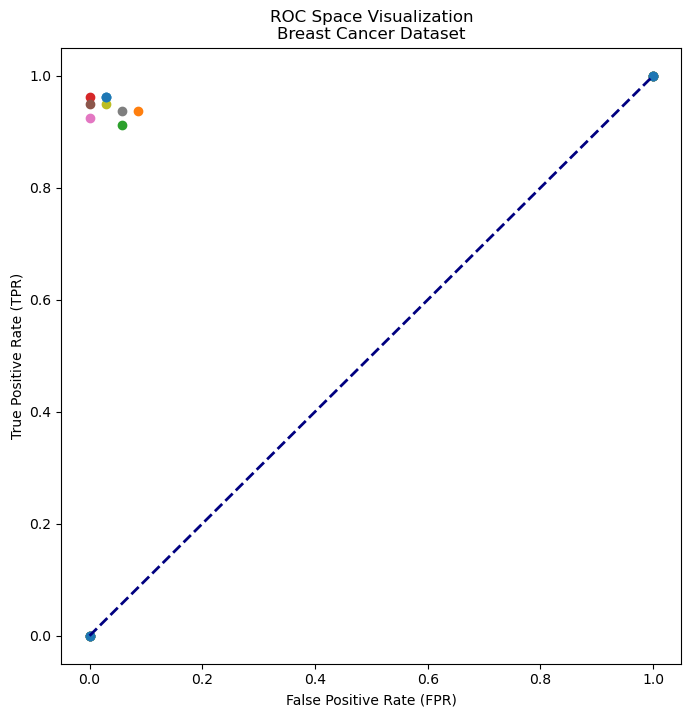

In [29]:
plt.figure(figsize=(8, 8))
for i in range(11):
    plt.scatter(fpr_iterations[i], tpr_iterations[i], label=f'Iteration {i}')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Space Visualization\nBreast Cancer Dataset')
plt.show()

Probaremos además con los siguientes modelos:
- 3 capas ocultas de 20, 10 y 5 neuronas respectivamente. Optimizador: Descenso del gradiente clásico. Función de activación: Sigmoide.
- 3 capas ocultas de 20, 10 y 5 neuronas respectivamente. Optimizador: Descenso del gradiente con momento. Función de activación: ReLU.
- 3 capas ocultas de 20, 10 y 5 neuronas respectivamente. Optimizador: Adam. Función de activación: Tangente hiperbólica.
- 3 capas ocultas de 20, 10 y 5 neuronas respectivamente. Optimizador: Adam. Función de activación: Sigmoide.

Además, a estos les iremos modificando el learning rate

In [51]:
nn_untrained = NeuralNetwork()
nn_untrained.set(SequentialLayer(30, 20, activation=activation_functions.sigmoid,
                                 activation_derivate=activation_functions.sigmoid_derivate))
nn_untrained.set(SequentialLayer(20, 10, activation=activation_functions.sigmoid,
                                 activation_derivate=activation_functions.sigmoid_derivate))
nn_untrained.set(SequentialLayer(10, 5, activation=activation_functions.sigmoid,
                                    activation_derivate=activation_functions.sigmoid_derivate))
nn_untrained.set(SequentialLayer(5, 2, activation=activation_functions.softmax,
                                 activation_derivate=activation_functions.softmax_derivate))

Y_pred_untrained = [np.argmax(nn_untrained.feedfoward(x)) for x in X_test]

In [52]:
fpr_untrained, tpr_untrained, _ = roc_curve(y_test[:, 1], Y_pred_untrained)
roc_auc_untrained = auc(fpr_untrained, tpr_untrained)

tpr_iterations = []
fpr_iterations = []

ns_probs = [0 for _ in range(len(y_test))]
ns_fpr, ns_tpr, _ = roc_curve(y_test[:, 1], ns_probs)

In [53]:
model1 = NeuralNetwork()
model1.set(SequentialLayer(30, 20, activation=activation_functions.sigmoid,
                                 activation_derivate=activation_functions.sigmoid_derivate))
model1.set(SequentialLayer(20, 10, activation=activation_functions.sigmoid,
                                 activation_derivate=activation_functions.sigmoid_derivate))
model1.set(SequentialLayer(10, 5, activation=activation_functions.sigmoid,
                                    activation_derivate=activation_functions.sigmoid_derivate))
model1.set(SequentialLayer(5, 2, activation=activation_functions.softmax,
                                 activation_derivate=activation_functions.softmax_derivate))

model2 = NeuralNetwork()
model2.set(SequentialLayer(30, 20, activation=activation_functions.ReLU,
                                 activation_derivate=activation_functions.ReLU_derivate))
model2.set(SequentialLayer(20, 10, activation=activation_functions.ReLU,
                                    activation_derivate=activation_functions.ReLU_derivate))
model2.set(SequentialLayer(10, 5, activation=activation_functions.ReLU,
                                    activation_derivate=activation_functions.ReLU_derivate))
model2.set(SequentialLayer(5, 2, activation=activation_functions.softmax,
                                    activation_derivate=activation_functions.softmax_derivate))

model3 = NeuralNetwork()
model3.set(SequentialLayer(30, 20, activation=activation_functions.tanh,
                                    activation_derivate=activation_functions.tanh_derivate))
model3.set(SequentialLayer(20, 10, activation=activation_functions.tanh,
                                    activation_derivate=activation_functions.tanh_derivate))
model3.set(SequentialLayer(10, 5, activation=activation_functions.tanh,
                                    activation_derivate=activation_functions.tanh_derivate))
model3.set(SequentialLayer(5, 2, activation=activation_functions.softmax,
                                    activation_derivate=activation_functions.softmax_derivate))

model4 = NeuralNetwork()
model4.set(SequentialLayer(30, 20, activation=activation_functions.sigmoid,
                                    activation_derivate=activation_functions.sigmoid_derivate))
model4.set(SequentialLayer(20, 10, activation=activation_functions.sigmoid,
                                    activation_derivate=activation_functions.sigmoid_derivate))
model4.set(SequentialLayer(10, 5, activation=activation_functions.sigmoid,
                                    activation_derivate=activation_functions.sigmoid_derivate))
model4.set(SequentialLayer(5, 2, activation=activation_functions.softmax,
                                    activation_derivate=activation_functions.softmax_derivate))

models = [model1, model2, model3, model4]
opts = [optimizers.gradient_descent, optimizers.momentum_gradient_descent, optimizers.Adam, optimizers.Adam]

In [56]:
learning_rates = [0.1, 0.01, 0.001, 0.0001]

In [57]:
for lr in learning_rates:
    for i, (model, optimizer) in enumerate(zip(models, opts)):
        print("Model:", i + 1, "- Learning Rate: ", lr)
        (acc, loss) = optimizer(model, X_train, y_train, measure_functions.accuracy, epochs=20, learning_rate=lr)

        Y_pred = [np.argmax(model.feedfoward(x)) for x in X_test]

        fpr, tpr, _ = roc_curve(y_test[:, 1], Y_pred)

        tpr_iterations.append(tpr)
        fpr_iterations.append(fpr)

Model: 1 - Learning Rate:  0.1
epoch   0 - Loss 0.02359, Accuracy 0.98901
epoch  10 - Loss 0.00044, Accuracy 0.97802
Model: 2 - Learning Rate:  0.1
epoch   0 - Loss 0.53737, Accuracy 0.60440
epoch  10 - Loss 0.53737, Accuracy 0.60440
Model: 3 - Learning Rate:  0.1
epoch   0 - Loss 0.00421, Accuracy 0.98901
epoch  10 - Loss 0.00630, Accuracy 0.97802
Model: 4 - Learning Rate:  0.1
epoch   0 - Loss 0.01828, Accuracy 0.98901
epoch  10 - Loss 0.00842, Accuracy 0.98901
Model: 1 - Learning Rate:  0.01
epoch   0 - Loss 0.00014, Accuracy 0.96703
epoch  10 - Loss 0.00022, Accuracy 0.96703
Model: 2 - Learning Rate:  0.01
epoch   0 - Loss 0.29017, Accuracy 0.60440
epoch  10 - Loss 0.29017, Accuracy 0.60440
Model: 3 - Learning Rate:  0.01
epoch   0 - Loss 0.00212, Accuracy 0.95604
epoch  10 - Loss 0.00246, Accuracy 0.95604
Model: 4 - Learning Rate:  0.01
epoch   0 - Loss 0.00566, Accuracy 0.98901
epoch  10 - Loss 0.01008, Accuracy 0.98901
Model: 1 - Learning Rate:  0.001
epoch   0 - Loss 0.00020, A

In [48]:
len(models)

4

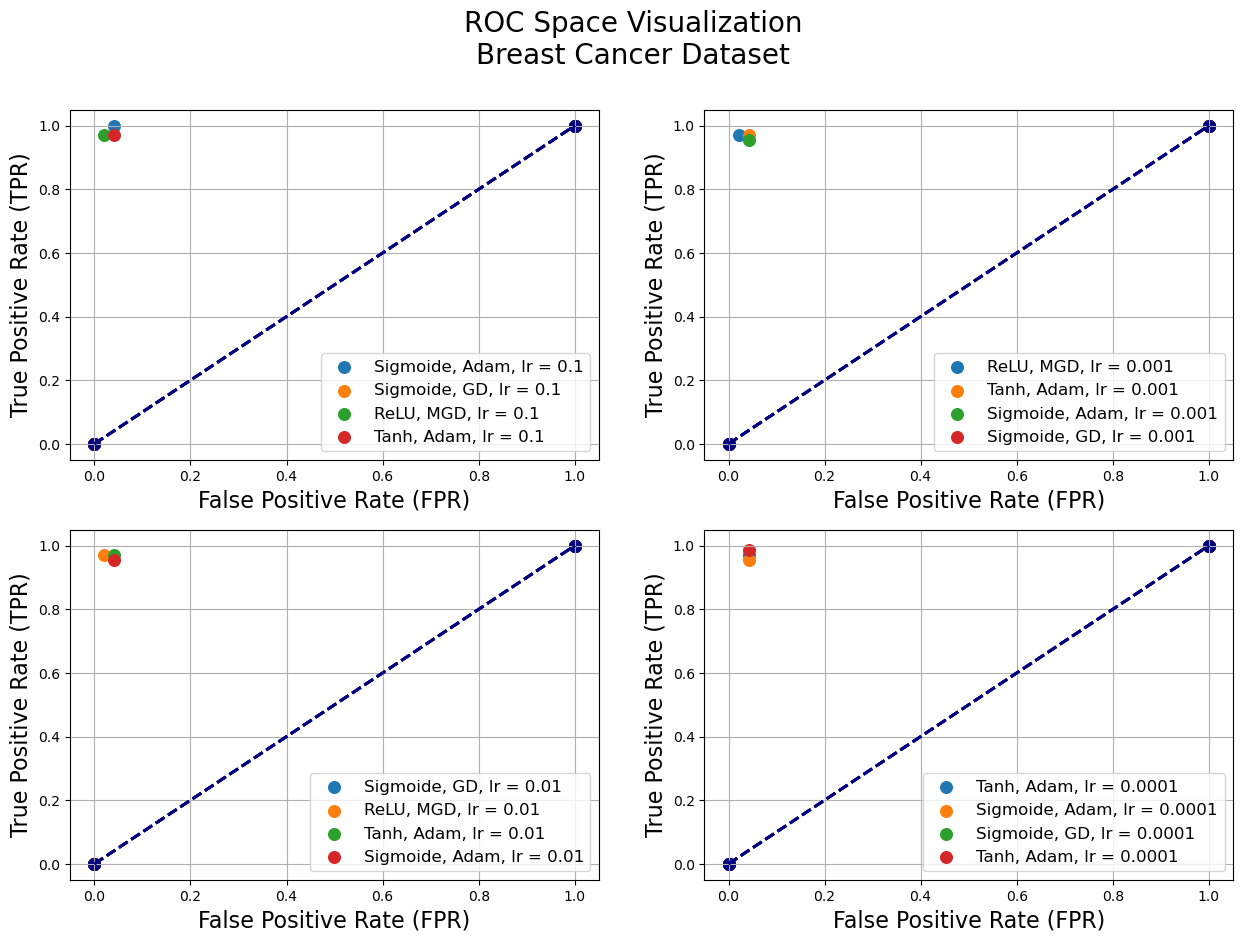

In [120]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

for col in range(2):
    for row in range(2):
        for i in range(col*2 + row, col*2 + row + 4):
            if (i + 4) % 4 == 0:
                label = "Sigmoide, Adam, lr = " + str(learning_rates[col*2 + row])
            elif (i + 3) % 3 == 0:
                label = "Tanh, Adam, lr = " + str(learning_rates[col*2 + row])
            elif (i + 2) % 2 == 0:
                label = "ReLU, MGD, lr = " + str(learning_rates[col*2 + row])
            else:
                label = "Sigmoide, GD, lr = " + str(learning_rates[col*2 + row])

            axs[row, col].scatter(fpr_iterations[i], tpr_iterations[i], label=label, s=70)
            axs[row, col].legend(loc='lower right', fontsize=12)

            axs[row, col].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
            axs[row, col].scatter(ns_fpr, ns_tpr, color='navy', s=70)

            axs[row, col].set_xlabel('False Positive Rate (FPR)', fontsize=16)
            axs[row, col].set_ylabel('True Positive Rate (TPR)', fontsize=16)

            axs[row, col].grid(True)

fig.suptitle('ROC Space Visualization\nBreast Cancer Dataset', fontsize=20)
plt.show()

In [21]:
fpr_iterations
tpr_iterations

[array([0., 1.]),
 array([0.        , 0.96969697, 1.        ]),
 array([0., 1.]),
 array([0.        , 0.96969697, 1.        ])]

# Red Neuronal Para Clasificar el Dataset de MNIST

### Definimos la red

Definimos ahora una red neuronal de 748 entradas, correspondiente con el tamaño de las imágenes del dataset MNIST una vez aplicado un flatten sobre ellas. La red dispondrá de una capa oculta de 10 neuronas, y una capa de salida de también 10 neuronas. La función de activación para la capa oculta será la ReLU, aunque para el paper se utilizó la función sigmoide, y para la de salida la función softmax.

In [ ]:
nn = NeuralNetwork()
nn.set(SequentialLayer(784, 10, activation=activation_functions.ReLU,
                                activation_derivate=activation_functions.ReLU_derivate))
nn.set(SequentialLayer(10, 10, activation=activation_functions.softmax, 
                                activation_derivate=activation_functions.softmax_derivate))

### Dataset de MNIST

Cargamos el dataset haciendo uso de la libería Keras, y dividimos el conjunto de datos en en train y test.

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
x_train = x_train.reshape((-1, 28*28))
x_train = x_train.astype('float64')/255

x_test = x_test.reshape((-1, 28*28))
x_test = x_test.astype('float64')/255

y_train = enc.fit_transform(y_train.reshape(-1,1)).toarray()
y_test = enc.fit_transform(y_test.reshape(-1,1)).toarray()

### Entrenamiento de la red

In [ ]:
print("accuracy before training: ", measure_functions.accuracy(y_test, [nn.feedfoward(x) for x in x_test]))
optimizers.Adam(nn, x_train, y_train, measure_functions.accuracy, epochs=80, learning_rate=0.001);

accuracy before training:  0.0912
epoch   0 - Loss 1.70404, Accuracy 0.47708
epoch  10 - Loss 0.17571, Accuracy 0.85167
epoch  20 - Loss 0.71546, Accuracy 0.89617
epoch  30 - Loss 1.89618, Accuracy 0.91458
epoch  40 - Loss 0.25085, Accuracy 0.92350
epoch  50 - Loss 0.05822, Accuracy 0.92650
epoch  60 - Loss 0.02447, Accuracy 0.92817
epoch  70 - Loss 0.02460, Accuracy 0.92867


In [ ]:
Y_pred = [nn.feedfoward(x) for x in x_test]
print("Accuracy after training (on test): ", measure_functions.accuracy(y_test, Y_pred))

Accuracy after training (on test):  0.9255


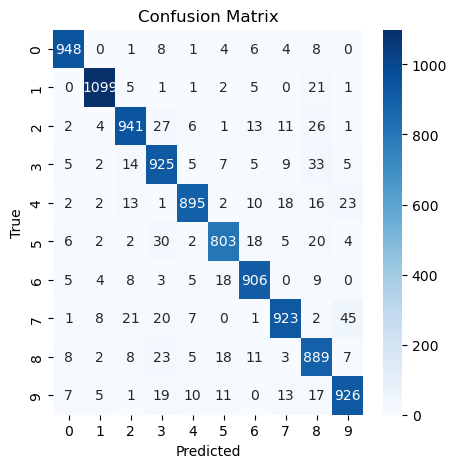

In [ ]:
Y_pred = [np.argmax(nn.feedfoward(x)) for x in x_test]
Y_test = [np.argmax(y) for y in y_test]

cm = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Autoencoder para la reconstrucción de imágenes MNIST

A continuación, definiremos un autoencoder, que es una red neuronal que tiene como objetivo aprender a reconstruir la entrada en la salida. Para ello, definiremos una red neuronal de 784 entradas, correspondiente con el tamaño de las imágenes del dataset MNIST una vez aplicado un flatten sobre ellas. La red dispondrá de dos capas ocultas, ocupándose la primera de reducir la dimensionalidad de la entrada a la del espacio latente, y la segunda de reconstruir la entrada a partir del espacio latente, junto con la capa de salida. La función de activación para las distintas capas será la función sigmoide.

In [ ]:
Autoencoder = NeuralNetwork()
Autoencoder.set(SequentialLayer(784, 128, activation=activation_functions.sigmoid,
                                activation_derivate=activation_functions.sigmoid_derivate))
Autoencoder.set(SequentialLayer(128, 9, activation=activation_functions.sigmoid,
                                activation_derivate=activation_functions.sigmoid_derivate))
Autoencoder.set(SequentialLayer(9, 128, activation=activation_functions.sigmoid,
                                activation_derivate=activation_functions.sigmoid_derivate))
Autoencoder.set(SequentialLayer(128, 784, activation=activation_functions.sigmoid,
                                activation_derivate=activation_functions.mse_derivate))

Hemos de tener en cuenta que la derivada de la función de activación de la capa de salida es realmente la derivada del error MSE, excelente para este tipo de problemas generativos, en base a una función de activación sigmoide, esto es:

$$\frac{\partial E}{\partial y} = \frac{\partial E}{\partial \hat{y}} \frac{\partial \hat{y}}{\partial y} = \frac{2}{m}(\hat{y} - y) \hat{y} (1 - \hat{y})$$


Una vez comprendido esto, cargamos el dataset MNIST, y dividimos el conjunto de datos en en train y test.

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train[:10000].reshape((-1, 28*28))
x_train = x_train.astype('float64')/255

x_test = x_test.reshape((-1, 28*28))
x_test = x_test.astype('float64')/255

Para entrenar, seguimos la misma metodología que en el caso anterior, pero esta vez, en lugar de utilizar el descenso del gradiente clásico, utilizaremos una versión adaptada la cual no realiza el cálculo del accuracy, pues no tiene sentido para modelos generativos.

In [ ]:
generative_optimizers.gradient_descent_autoenc(Autoencoder, 
                                               x_train, 
                                               x_train, 
                                               epochs=200, 
                                               learning_rate=0.01);

epoch   0 - Loss 0.20307
epoch  10 - Loss 0.16052
epoch  20 - Loss 0.17367
epoch  30 - Loss 0.18167
epoch  40 - Loss 0.19060
epoch  50 - Loss 0.18942
epoch  60 - Loss 0.19051
epoch  70 - Loss 0.18928
epoch  80 - Loss 0.19079
epoch  90 - Loss 0.19598
epoch 100 - Loss 0.20049
epoch 110 - Loss 0.19847
epoch 120 - Loss 0.19932
epoch 130 - Loss 0.20280
epoch 140 - Loss 0.19882
epoch 150 - Loss 0.19681
epoch 160 - Loss 0.20153
epoch 170 - Loss 0.20438
epoch 180 - Loss 0.20134
epoch 190 - Loss 0.20285


En apenas la primera época, el modelo ya alcanza un error muy bajo, y se producen pequeñas oscilaciones en el error. No obstante, el modelo sigue aprendiendo pese que al error no disminuya, debido a la implementación correcta del backpropagation. La función de error MSE es una función muy influenciable por outliers o imágenes poco comunes, por lo que a medida que se entrena y se ajusta el modelo a las imágenes más frecuentes, este error se aumenta.

En la siguiente gráfica, se puede comprobar como el modelo es capaz de reconstruir imágenes de dígitos correctamente.

In [ ]:
def print_images(init_pos, n, x_train, model, save=False, name=None):
    plt.figure(figsize=(19, 4))
    plt.gray()

    output = [model.feedfoward(x_train[i]).reshape(28, 28) for i in range(init_pos, init_pos + n)]
    
    for i, item in enumerate(x_train[init_pos:init_pos + n]):
        plt.subplot(2, n, i + 1)
        plt.title(f'Original')
        item = item.reshape(-1, 28, 28)
        plt.imshow(item[0])

    for i, item in enumerate(output):
        plt.subplot(2, n, n + i + 1)
        plt.title(f'Generated')
        item = item.reshape(-1, 28, 28)
        plt.imshow(item[0])

    plt.tight_layout()
    plt.subplots_adjust(hspace=0.5)
    if save == True and name != None: plt.savefig(f'images/{name}.png')
    plt.show()

Si comprobamos los resultados obtenidos, basta analizar los resultados para las imágenes de entrenamiento para ver que el modelo se ha entrenado correctamente

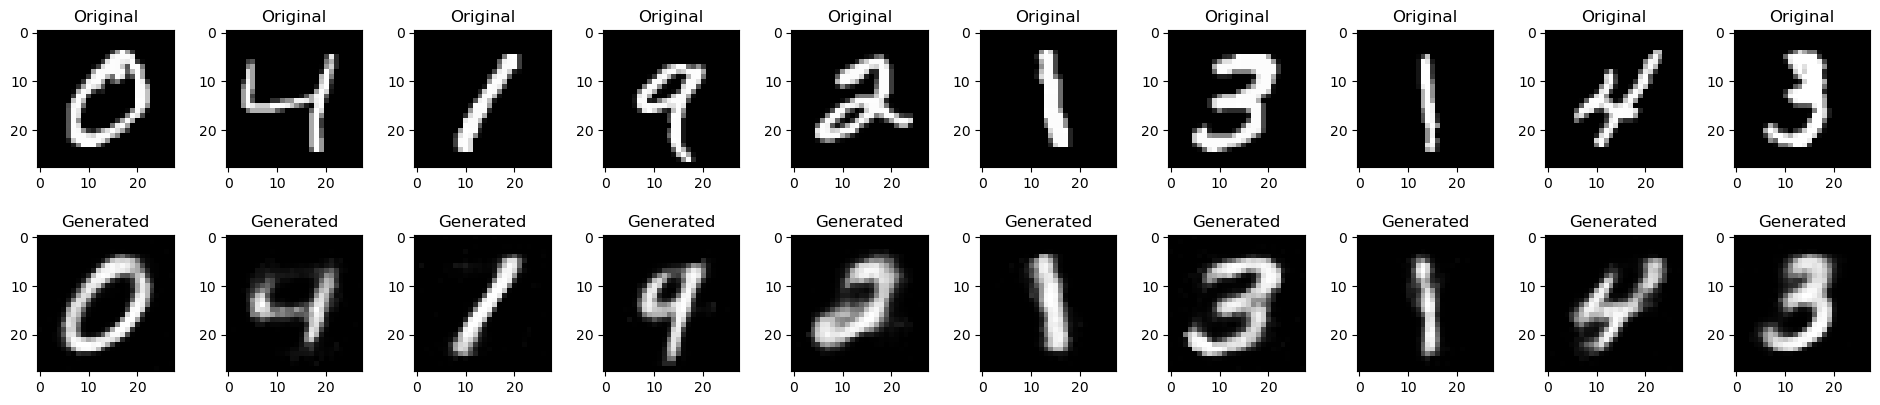

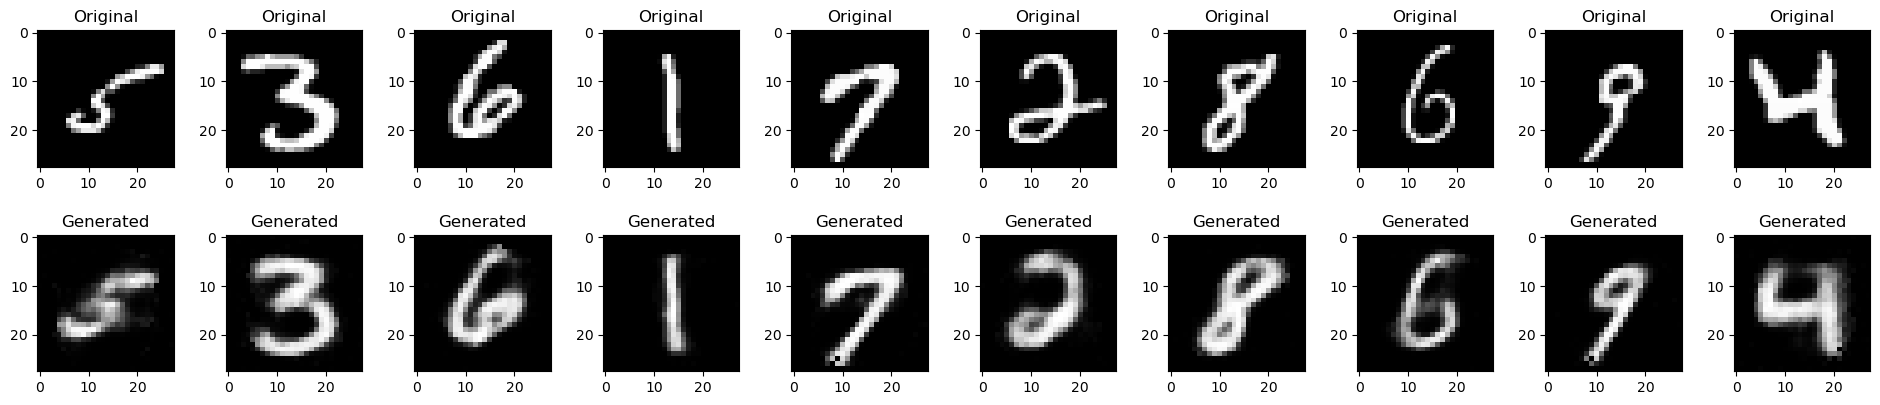

In [ ]:
print_images(1, 10, x_train, Autoencoder)
print_images(11, 10, x_train, Autoencoder)

Para las imágenes de test, el modelo también se comporta correctamente, aunque se puede observar que el error es mayor, debido a que el modelo no ha sido entrenado con estas imágenes, y por tanto, no ha aprendido a reconstruirlas tan bien.

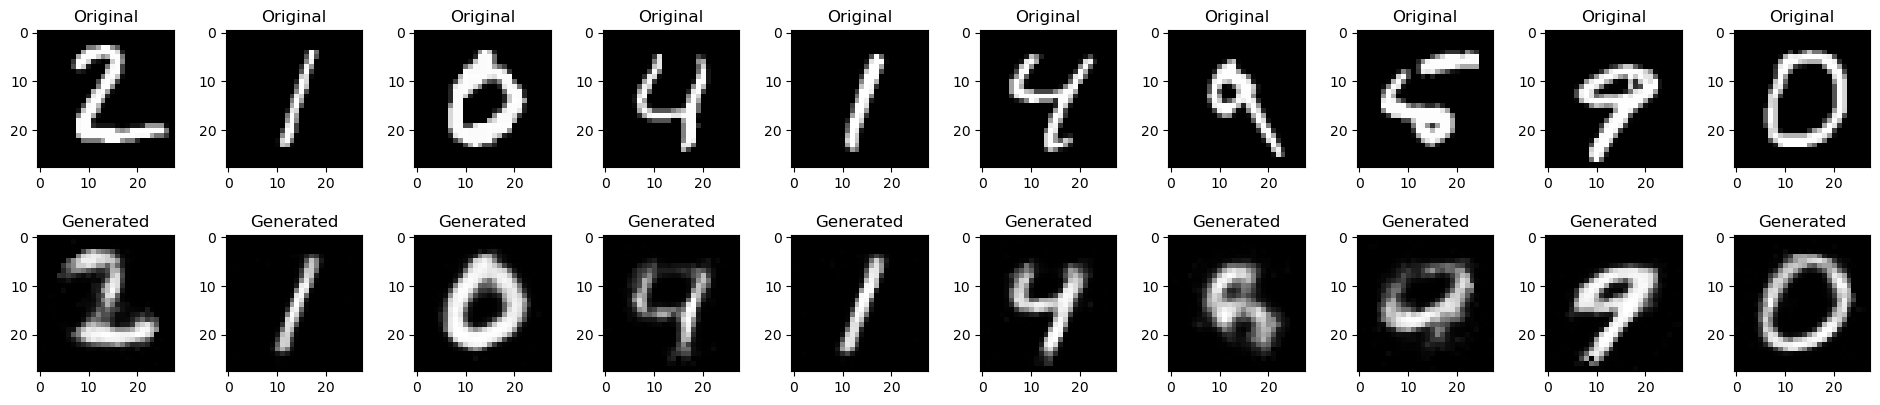

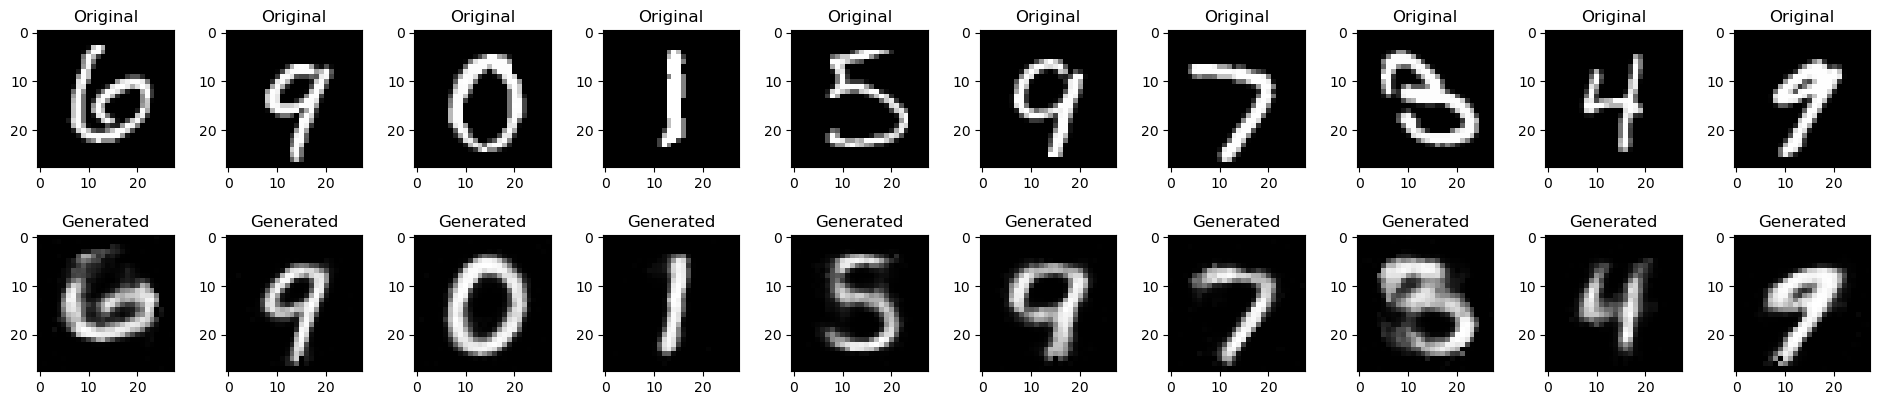

In [ ]:
print_images(1, 10, x_test, Autoencoder)
print_images(11, 10, x_test, Autoencoder)

Estos resultado son bastante impresionantes, más aún si tenemos en cuenta su evolucion a lo largo de las épocas. La siguiente imagen, por ejemplo, muestra la reconstrucción de un conjunto de imágenes de validación en la época 20.

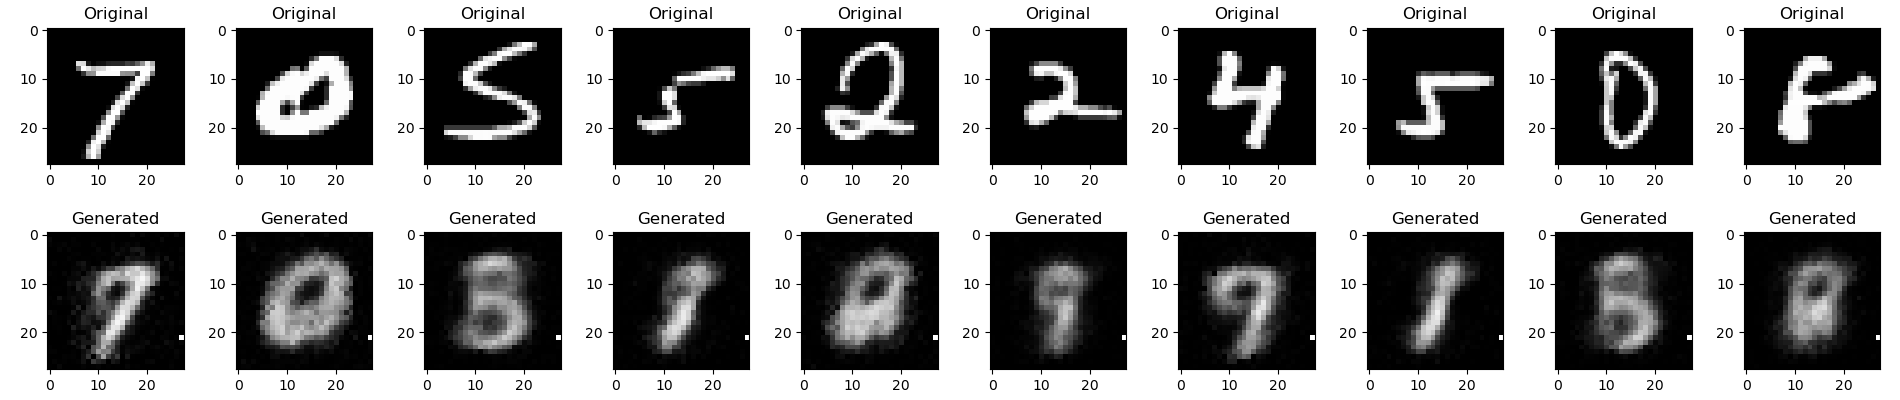

Terminado el entrenamiento y su validación, guardamos el modelo para su posterior uso.

In [ ]:
Autoencoder.save('models/autoencoder')

# Autoencoder para la reducción de ruido en imágenes MNIST

A continuación, desarrollaremos un autoencoder similar, esta vez centrado en la reducción de ruido en la imagen. Para ello, añadiremos ruido a las imágenes de entrada, y entrenaremos la red para que sea capaz de eliminar el ruido de las imágenes de entrada.

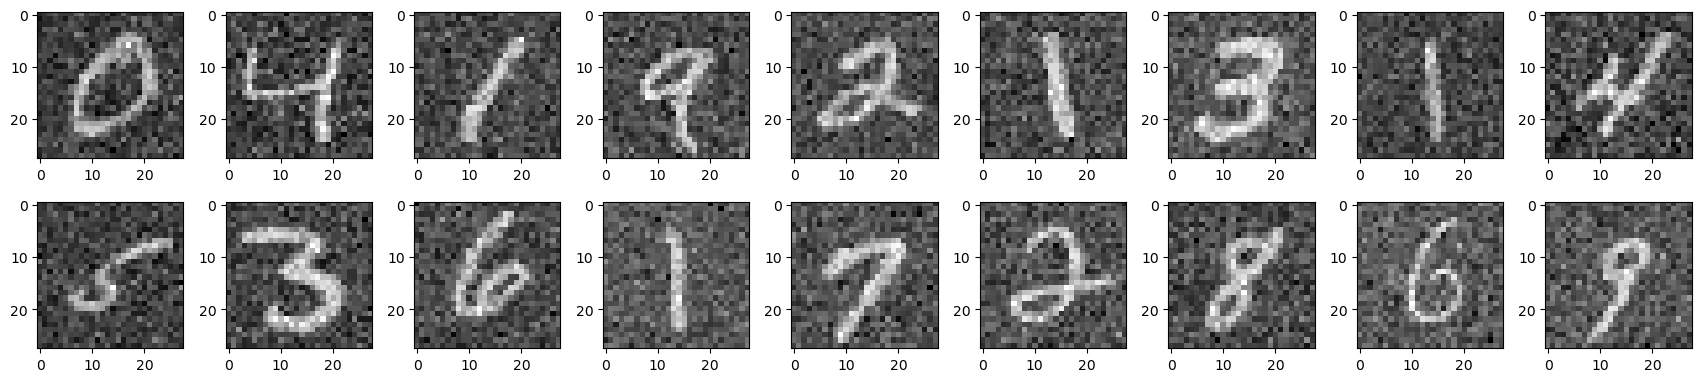

In [ ]:
def gaussian_noise(x, mean=0, std=1):
    return x + np.random.normal(mean, std, x.shape)

noised_x_train = gaussian_noise(x_train, std=0.2)

plt.figure(figsize=(19, 4))
plt.gray()

for i, item in enumerate(noised_x_train[1:10]):
    plt.subplot(2, 10, i + 1)
    item = item.reshape(-1, 28, 28)
    plt.imshow(item[0])

for i, item in enumerate(noised_x_train[11:20]):
    plt.subplot(2, 10, 10 + i + 1)
    item = item.reshape(-1, 28, 28)
    plt.imshow(item[0])

plt.tight_layout()
plt.show()

Definiremos un modelo con la misma complejidad que el anterior, y nuevamente cargaremos el dataset MNIST, y dividimos el conjunto de datos en en train y test.

In [ ]:
NoiseRedAutoencoder = NeuralNetwork()
NoiseRedAutoencoder.set(SequentialLayer(784, 128, activation=activation_functions.sigmoid,
                                activation_derivate=activation_functions.sigmoid_derivate))
NoiseRedAutoencoder.set(SequentialLayer(128, 9, activation=activation_functions.sigmoid,
                                activation_derivate=activation_functions.sigmoid_derivate))
NoiseRedAutoencoder.set(SequentialLayer(9, 128, activation=activation_functions.sigmoid,
                                activation_derivate=activation_functions.sigmoid_derivate))
NoiseRedAutoencoder.set(SequentialLayer(128, 784, activation=activation_functions.sigmoid,
                                activation_derivate=activation_functions.mse_derivate))

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train[:30000].reshape((-1, 28*28))
x_train = x_train.astype('float64')/255

x_test = x_test.reshape((-1, 28*28))
x_test = x_test.astype('float64')/255

Hecho esto, añadimos ruido a las imágenes de entrada, y entrenamos el modelo. En este caso, utilizaremos el descenso del gradiente clásico adaptado a modelos generativos. Además, le pasaremos como entrada al optimizador los datos correspondiente a las imágenes con ruido, y como salida las imágenes sin ruido, con el objetivo de que el modelo aprenda a eliminarlo de las imágenes.

In [ ]:
noised_x_train = gaussian_noise(x_train, std=0.4)

In [ ]:
generative_optimizers.gradient_descent_autoenc(NoiseRedAutoencoder,
                                                noised_x_train, x_train,
                                                epochs=250,
                                                learning_rate=0.01);

epoch   0 - Loss 0.16667
epoch  10 - Loss 0.14671
epoch  20 - Loss 0.14787
epoch  30 - Loss 0.15477
epoch  40 - Loss 0.16318
epoch  50 - Loss 0.17530
epoch  60 - Loss 0.18460
epoch  70 - Loss 0.19020
epoch  80 - Loss 0.19157
epoch  90 - Loss 0.19533
epoch 100 - Loss 0.18972
epoch 110 - Loss 0.19463
epoch 120 - Loss 0.18507
epoch 130 - Loss 0.19458
epoch 140 - Loss 0.19683
epoch 150 - Loss 0.20958
epoch 160 - Loss 0.19847
epoch 170 - Loss 0.20358
epoch 180 - Loss 0.20711
epoch 190 - Loss 0.19851
epoch 200 - Loss 0.20932
epoch 210 - Loss 0.21563
epoch 220 - Loss 0.21697
epoch 230 - Loss 0.20666
epoch 240 - Loss 0.21791


Si visualizamos los resultados obtenidos, podemos comprobar que el modelo es capaz de eliminar el ruido de las imágenes de entrada, incluso para un nivel de ruido bastante elevado.

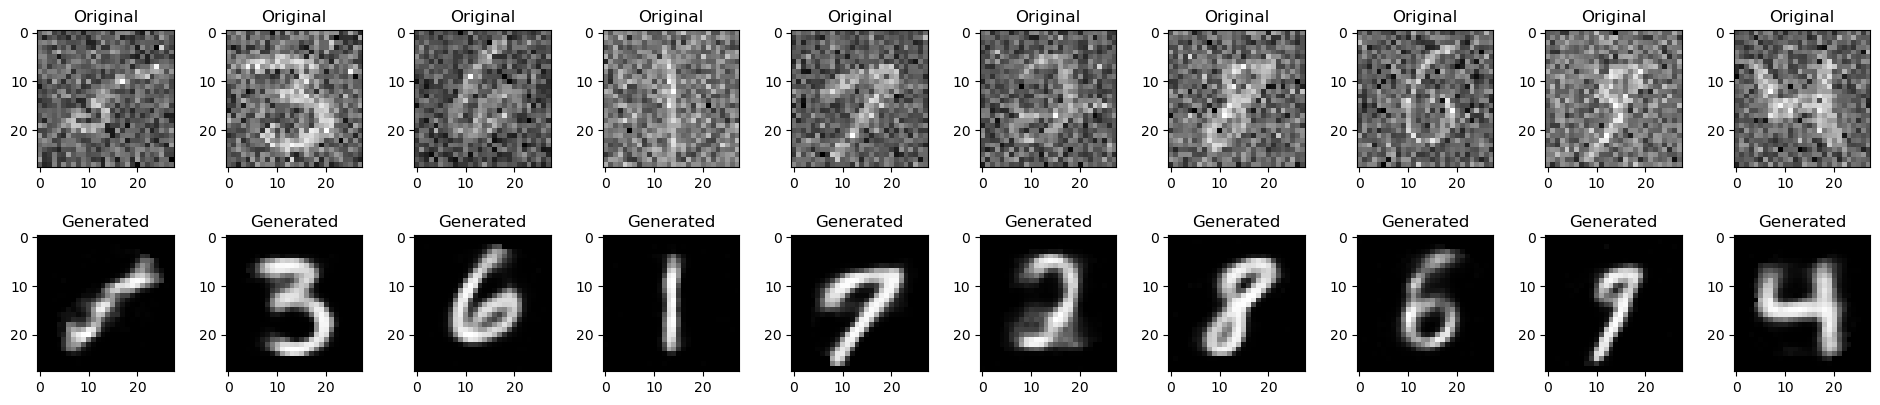

In [ ]:
print_images(11, 10, noised_x_train, NoiseRedAutoencoder, 
             save=True, name='results/NoiseRedAutoencoder0.4std')

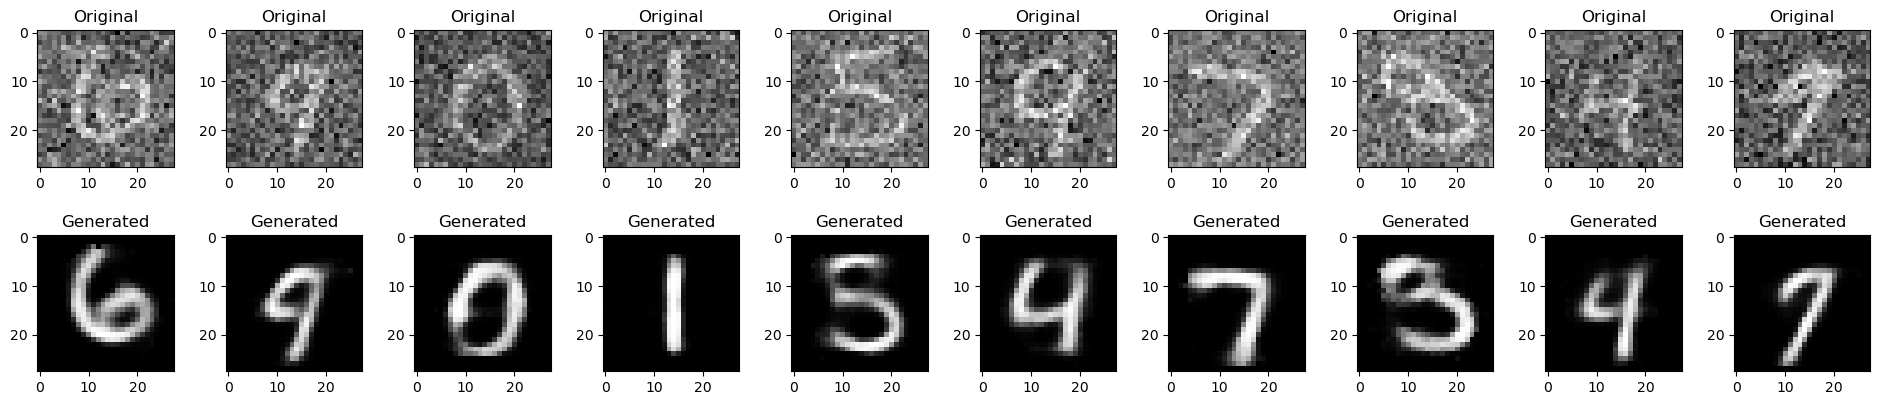

In [ ]:
print_images(11, 10, gaussian_noise(x_test, std=0.4), NoiseRedAutoencoder,
            save=True, name='results/NoiseRedAutoencoder0.4std_test')

Como último paso, guardamos el modelo para su posterior uso.

In [ ]:
NoiseRedAutoencoder.save('models/NoiseRedAutoencoder_0.4std')

# Redes Neuronales para problemas de regresión

Desarrollaremos a continuación un modelo de regresión para un dataset relacionado con la calidad del vino tinto en función de sus características, problema el cual puede resolverse con una regresión lineal simple. Lo primero que haremos será cargar el dataset, y dividirlo en train y test. El conjutno de datos ha sido obtenido de la siguiente fuente: https://archive.ics.uci.edu/dataset/186/wine+quality

In [2]:
from ucimlrepo import fetch_ucirepo 
wine_quality = fetch_ucirepo(id=186) 
  
X = wine_quality.data.features 
y = wine_quality.data.targets 

X

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


In [3]:
y

,quality
0,5
1,5
2,5
3,6
4,5
...,...
6492,6
6493,5
6494,6
6495,7


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

A continuación, definimos el modelo, el cual tendrá 11 entradas, correspondientes con las características del vino, y una salida, correspondiente con la calidad del vino. La función de activación de la capa de salida será la función lineal, pues se trata de un problema de regresión.

In [ ]:
wine_quality_nn = NeuralNetwork()
wine_quality_nn.set(SequentialLayer(11, 20, activation=activation_functions.sigmoid,
                                activation_derivate=activation_functions.sigmoid_derivate))
wine_quality_nn.set(SequentialLayer(20, 20, activation=activation_functions.sigmoid,
                                activation_derivate=activation_functions.sigmoid_derivate))
wine_quality_nn.set(SequentialLayer(20, 20, activation=activation_functions.sigmoid,
                                activation_derivate=activation_functions.sigmoid_derivate))
wine_quality_nn.set(SequentialLayer(20, 1, activation=activation_functions.identity,
                                activation_derivate=activation_functions.mse_derivate2))

La función mse_derivative ya supone que la función de activación de la capa de salida es la función sigmoide, por lo que no es necesario definirla en la derivada. 

Una vez definido el modelo, entrenamos el modelo con el conjunto de entrenamiento, y mostramos la evolución del error en cada iteración. Utilizaremos el optimizador del descenso del gradiente clásico, con una tasa de aprendizaje de 0.01

In [ ]:
loss = generative_optimizers.gradient_descent_regression(wine_quality_nn, 
                                               X_train, 
                                               y_train, 
                                               epochs=10, 
                                               learning_rate=0.001);

Loss before training 44.48192
epoch   0 - Loss 0.43448
epoch   1 - Loss 0.42674
epoch   2 - Loss 0.44857
epoch   3 - Loss 0.46946
epoch   4 - Loss 0.49201
epoch   5 - Loss 0.51406
epoch   6 - Loss 0.57085
epoch   7 - Loss 0.63097
epoch   8 - Loss 0.67443
epoch   9 - Loss 0.69535


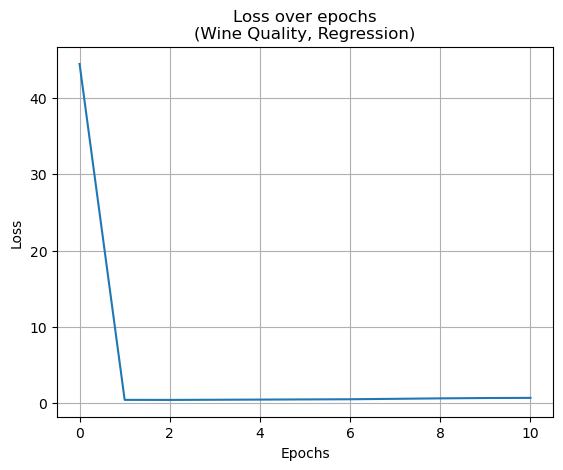

In [ ]:
plt.plot(loss)
plt.title('Loss over epochs\n(Wine Quality, Regression)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.show()

Efectivamente, podemos ver como el modelo es capaz de ajustarse a los datos de entrenamiento en apenas una época, con una muy buena medida de error. Probaremos ahora con otro dataset, esta vez relacionado con la esperanza de vida proporcionado por la OMS, con el objetivo de comprobar la capacidad de generalización del modelo. El conjunto de datos ha sido obtenido de la siguiente fuente en kaggle:  https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who

In [118]:
dataset = pd.read_csv('NNScratchLib/datasets/life_exp.csv')

In [119]:
dataset.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [120]:
for feature in dataset.columns:
    print(feature, type(dataset[feature][0]))

Country <class 'str'>
Year <class 'numpy.int64'>
Status <class 'str'>
Life expectancy  <class 'numpy.float64'>
Adult Mortality <class 'numpy.float64'>
infant deaths <class 'numpy.int64'>
Alcohol <class 'numpy.float64'>
percentage expenditure <class 'numpy.float64'>
Hepatitis B <class 'numpy.float64'>
Measles  <class 'numpy.int64'>
 BMI  <class 'numpy.float64'>
under-five deaths  <class 'numpy.int64'>
Polio <class 'numpy.float64'>
Total expenditure <class 'numpy.float64'>
Diphtheria  <class 'numpy.float64'>
 HIV/AIDS <class 'numpy.float64'>
GDP <class 'numpy.float64'>
Population <class 'numpy.float64'>
 thinness  1-19 years <class 'numpy.float64'>
 thinness 5-9 years <class 'numpy.float64'>
Income composition of resources <class 'numpy.float64'>
Schooling <class 'numpy.float64'>


In [121]:
dataset.columns = [x.lower() for x in dataset.columns]
dataset.columns = [x.strip() for x in dataset.columns]
dataset.columns = [x.replace(' ', '_') for x in dataset.columns]
dataset.head()

,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,...,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [122]:
dataset['life_expectancy'] = dataset['life_expectancy'].astype('category')

In [123]:
dataset = dataset.select_dtypes(include=['float64', 'int64', 'category'])
dataset = dataset.astype('float64')
dataset = dataset.dropna()

for feature in dataset.columns:
    print(feature, type(dataset[feature][0]))

year <class 'numpy.float64'>
life_expectancy <class 'numpy.float64'>
adult_mortality <class 'numpy.float64'>
infant_deaths <class 'numpy.float64'>
alcohol <class 'numpy.float64'>
percentage_expenditure <class 'numpy.float64'>
hepatitis_b <class 'numpy.float64'>
measles <class 'numpy.float64'>
bmi <class 'numpy.float64'>
under-five_deaths <class 'numpy.float64'>
polio <class 'numpy.float64'>
total_expenditure <class 'numpy.float64'>
diphtheria <class 'numpy.float64'>
hiv/aids <class 'numpy.float64'>
gdp <class 'numpy.float64'>
population <class 'numpy.float64'>
thinness__1-19_years <class 'numpy.float64'>
thinness_5-9_years <class 'numpy.float64'>
income_composition_of_resources <class 'numpy.float64'>
schooling <class 'numpy.float64'>


In [124]:
dataset.head()

,year,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
0,2015.0,65.0,263.0,62.0,0.01,71.279624,65.0,1154.0,19.1,83.0,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014.0,59.9,271.0,64.0,0.01,73.523582,62.0,492.0,18.6,86.0,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013.0,59.9,268.0,66.0,0.01,73.219243,64.0,430.0,18.1,89.0,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012.0,59.5,272.0,69.0,0.01,78.184215,67.0,2787.0,17.6,93.0,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011.0,59.2,275.0,71.0,0.01,7.097109,68.0,3013.0,17.2,97.0,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [125]:
X = dataset.drop(['life_expectancy'], axis=1)
y = dataset['life_expectancy']

y = y.values.reshape(-1, 1)

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
X_train

,year,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles,bmi,under-five_deaths,polio,total_expenditure,diphtheria,hiv/aids,gdp,population,thinness__1-19_years,thinness_5-9_years,income_composition_of_resources,schooling
907,2006.0,211.0,0.0,2.06,52.124163,99.0,136.0,55.9,0.0,98.0,3.84,98.0,0.1,3749.939813,827411.0,4.1,3.8,0.695,14.0
638,2002.0,99.0,1.0,4.17,112.949375,94.0,0.0,47.3,1.0,94.0,8.23,94.0,0.1,462.149650,46324.0,2.2,2.2,0.712,11.9
1697,2001.0,126.0,52.0,4.86,13.311095,97.0,3.0,53.2,62.0,97.0,5.35,97.0,0.1,731.378864,136768.0,1.9,1.9,0.700,11.6
530,2013.0,366.0,46.0,0.64,76.523825,39.0,226.0,18.2,78.0,46.0,3.42,39.0,3.1,986.131770,13133589.0,8.8,8.7,0.387,7.3
861,2004.0,342.0,7.0,0.64,10.260973,84.0,24.0,13.6,10.0,98.0,3.14,98.0,1.8,287.422224,3858623.0,9.6,9.6,0.000,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1347,2014.0,22.0,5.0,6.29,24.444737,95.0,321.0,52.3,5.0,95.0,4.36,95.0,0.1,1286.565110,17289224.0,2.4,2.5,0.789,15.0
1473,2000.0,112.0,1.0,2.26,404.387943,83.0,5.0,57.9,1.0,83.0,1.86,83.0,0.1,5334.933290,3235366.0,4.9,4.8,0.000,14.9
2054,2000.0,153.0,3.0,8.40,412.432397,99.0,77.0,53.1,4.0,98.0,5.50,98.0,0.1,4492.727640,38258629.0,2.5,2.8,0.777,14.6
987,2006.0,126.0,1.0,6.18,110.113829,84.0,334.0,49.2,1.0,89.0,8.39,88.0,0.1,1872.684160,4136.0,2.7,2.9,0.714,12.6


In [127]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

Una vez procesado el dataset, entrenamos el modelo con el conjunto de entrenamiento, y mostramos la evolución del error en cada iteración. Utilizaremos el optimizador del descenso del gradiente clásico, con una tasa de aprendizaje de 0.01

In [207]:
life_expectancy_nn = NeuralNetwork()
life_expectancy_nn.set(SequentialLayer(19, 20, activation=activation_functions.sigmoid,
                                activation_derivate=activation_functions.sigmoid_derivate))
life_expectancy_nn.set(SequentialLayer(20, 15, activation=activation_functions.sigmoid,
                                activation_derivate=activation_functions.sigmoid_derivate))
life_expectancy_nn.set(SequentialLayer(15, 10, activation=activation_functions.sigmoid,
                                activation_derivate=activation_functions.sigmoid_derivate))
life_expectancy_nn.set(SequentialLayer(10, 1, activation=activation_functions.identity,
                                activation_derivate=activation_functions.mse_derivate2))

In [208]:
loss3 = generative_optimizers.gradient_descent_regression(life_expectancy_nn,
                                                  X_train, 
                                                  y_train, 
                                                  epochs=200,
                                                  learning_rate=0.000001);

Loss before training 4594.92935
epoch   0 - Loss 2716.70244
epoch  10 - Loss 2017.91441
epoch  20 - Loss 1465.78451
epoch  30 - Loss 1043.54221
epoch  40 - Loss 727.41004
epoch  50 - Loss 494.01735
epoch  60 - Loss 324.31042
epoch  70 - Loss 203.28756
epoch  80 - Loss 119.24626
epoch  90 - Loss 63.09834
epoch 100 - Loss 27.82112
epoch 110 - Loss 8.08962
epoch 120 - Loss 0.31040
epoch 130 - Loss 2.52476
epoch 140 - Loss 11.97079
epoch 150 - Loss 25.51959
epoch 160 - Loss 41.18274
epoch 170 - Loss 57.71516
epoch 180 - Loss 74.29634
epoch 190 - Loss 90.38886


Probaremos para distintas arquitecturas con el objetivo de ver como de bien se ajusta el modelo para distintas complejidades.

In [205]:
life_expectancy_nn = NeuralNetwork()
life_expectancy_nn.set(SequentialLayer(19, 10, activation=activation_functions.sigmoid,
                                activation_derivate=activation_functions.sigmoid_derivate))
life_expectancy_nn.set(SequentialLayer(10, 10, activation=activation_functions.sigmoid,
                                activation_derivate=activation_functions.sigmoid_derivate))
life_expectancy_nn.set(SequentialLayer(10, 1, activation=activation_functions.identity,
                                activation_derivate=activation_functions.mse_derivate2))

In [206]:
loss2 = generative_optimizers.gradient_descent_regression(life_expectancy_nn,
                                                    X_train, 
                                                    y_train, 
                                                    epochs=200,
                                                    learning_rate=0.000001);

Loss before training 4753.54764
epoch   0 - Loss 2826.85057
epoch  10 - Loss 2040.65902
epoch  20 - Loss 1426.25688
epoch  30 - Loss 941.64979
epoch  40 - Loss 606.22741
epoch  50 - Loss 373.52547
epoch  60 - Loss 214.07045
epoch  70 - Loss 107.85755
epoch  80 - Loss 42.30236
epoch  90 - Loss 9.19929
epoch 100 - Loss 0.00108
epoch 110 - Loss 6.29565
epoch 120 - Loss 21.58357
epoch 130 - Loss 41.42990
epoch 140 - Loss 62.97834
epoch 150 - Loss 84.46632
epoch 160 - Loss 104.86303
epoch 170 - Loss 123.61748
epoch 180 - Loss 140.48689
epoch 190 - Loss 155.42092


Por último, definiremos un modelo con una única capa oculta de 10 neuronas, y una capa de salida de una neurona, con el objetivo de comprobar la capacidad de generalización del modelo.

In [203]:
life_expectancy_nn = NeuralNetwork()
life_expectancy_nn.set(SequentialLayer(19, 10, activation=activation_functions.sigmoid,
                                activation_derivate=activation_functions.sigmoid_derivate))
life_expectancy_nn.set(SequentialLayer(10, 1, activation=activation_functions.identity,
                                activation_derivate=activation_functions.mse_derivate2))

In [204]:
loss1 = generative_optimizers.gradient_descent_regression(life_expectancy_nn,
                                                    X_train, 
                                                    y_train, 
                                                    epochs=200,
                                                    learning_rate=0.000001);

Loss before training 5342.01452
epoch   0 - Loss 3239.21824
epoch  10 - Loss 2052.87751
epoch  20 - Loss 1263.72351
epoch  30 - Loss 747.54335
epoch  40 - Loss 417.74966
epoch  50 - Loss 214.16505
epoch  60 - Loss 95.12176
epoch  70 - Loss 31.90103
epoch  80 - Loss 4.82287
epoch  90 - Loss 0.49954
epoch 100 - Loss 9.90907
epoch 110 - Loss 27.04614
epoch 120 - Loss 47.97927
epoch 130 - Loss 70.19342
epoch 140 - Loss 92.13316
epoch 150 - Loss 112.88615
epoch 160 - Loss 131.96509
epoch 170 - Loss 149.15809
epoch 180 - Loss 164.42697
epoch 190 - Loss 177.83864


Si graficamos los resultados obtenidos

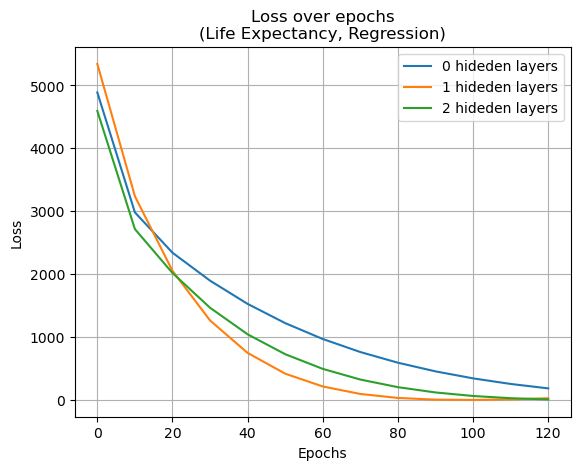

In [214]:
plt.plot([x*10 for x in range(13)], loss[:13], label='0 hideden layers')
plt.plot([x*10 for x in range(13)], loss1[:13], label='1 hideden layers')
plt.plot([x*10 for x in range(13)], loss3[:13], label='2 hideden layers')
plt.title('Loss over epochs\n(Life Expectancy, Regression)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

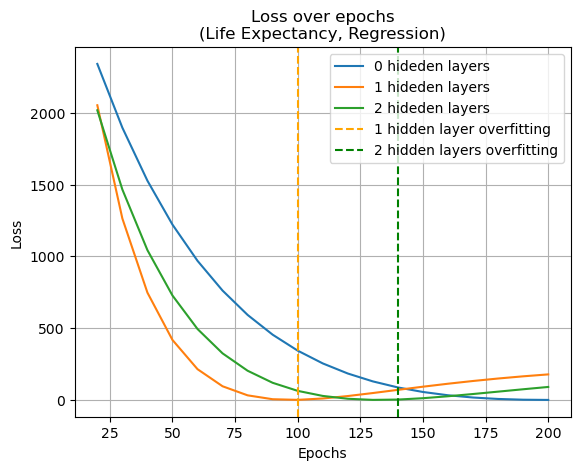

In [229]:
#plot pero a partir de la epoch 2 hasta la epcoh len(loss)
plt.plot([x*10 for x in range(2, len(loss))], loss[2:], label='0 hideden layers')
plt.plot([x*10 for x in range(2, len(loss1))], loss1[2:], label='1 hideden layers')
plt.plot([x*10 for x in range(2, len(loss3))], loss3[2:], label='2 hideden layers')
plt.title('Loss over epochs\n(Life Expectancy, Regression)')
plt.xlabel('Epochs')
plt.ylabel('Loss')

# linea vertical en la epoch 13
plt.axvline(x=100, color='orange', linestyle='--', label='1 hidden layer overfitting')
plt.axvline(x=140, color='green', linestyle='--', label='2 hidden layers overfitting')

plt.legend()
plt.grid()
plt.show()